# Карты ДТП

Автор: Галимова Лидия

Дата: 10.09.2025

#### Цели и задачи:

##### Цель: 
* Проанализировать качество данных, дать рекомендации заказчику (на какие проблемы или особенности обратить внимание).

##### Задачи: 
* Проверить данные на дубликаты и пропуски
* Проверить корректность типов данных и названий столбцов
* Провести анализ данных

#### Описание данных:

##### Датасеты Kirovskaya_oblast.csv, Moscowskaya_oblast.csv содержат информацию о ДТП:
* geometry.coordinates — координаты ДТП;
* id — идентификатор ДТП;
* properties.tags — тег происшествия;
* properties.light — освещённость;
* properties.point.lat — широта;
* properties.point.long — долгота;
* properties.nearby — ближайшие объекты;
* properties.region — регион;
* properties.scheme — схема ДТП;
* properties.address — ближайший адрес;
* properties.weather — погода;
* properties.category — категория ДТП;
* properties.datetime — дата и время ДТП;
* properties.injured_count — число пострадавших;
* properties.parent_region — область;
* properties.road_conditions — состояние покрытия;
* properties.participants_count — число участников;
* properties.participant_categories — категории участников.

##### Датасеты Moscowskaya_oblast_participiants.csv, Kirovskaya_oblast_participiants.csv хранят сведения об участниках ДТП:
* role — роль;
* gender — пол;
* violations — какие правила дорожного движения были нарушены конкретным участником;
* health_status — состояние здоровья после ДТП;
* years_of_driving_experience — число лет опыта;
* id — идентификатор ДТП.

##### Датасеты Kirovskaya_oblast_vehicles.csv, Moscowskaya_oblast_vehicles.csv хранят сведения о транспортных средствах:
* year — год выпуска;
* brand — марка транспортного средства;
* color — цвет;
* model — модель;
* category — категория;
* id — идентификатор ДТП. 

# 1.Предобработка данных

In [1]:
#загружаем библиотеки
import pandas as pd

In [2]:
#выгружаем данные
Kir_obl = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast.csv')
Mos_obl = pd.read_csv('https://code.s3.yandex.net/datasets/Moscowskaya_oblast.csv')
Kir_par = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast_participiants.csv')
Mos_par = pd.read_csv('https://code.s3.yandex.net/datasets/Moscowskaya_oblast_participiants.csv')
Kir_veh = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast_vehicles.csv')
Mos_veh = pd.read_csv('https://code.s3.yandex.net/datasets/Moscowskaya_oblast_vehicles.csv') 

#### Предобработка датасета Kir_obl

In [3]:
#проверяем данные Kir_obl (первые 5 строк)
Kir_obl.head()

,geometry.coordinates,id,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.region,properties.scheme,properties.address,properties.weather,properties.category,properties.datetime,properties.injured_count,properties.parent_region,properties.road_conditions,properties.participants_count,properties.participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники']
3,"[47.834365, 57.244775]",2577639,Дорожно-транспортные происшествия,Светлое время суток,57.244775,47.834365,['Жилые дома индивидуальной застройки'],Яранский район,200.0,"м Знаменка, ул Кирова, 15",['Пасмурно'],Столкновение,2021-05-31 18:55:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
4,"[47.968197, 57.357738]",1981026,Дорожно-транспортные происшествия,Светлое время суток,57.357738,47.968197,['Нерегулируемый перекрёсток неравнозначных ул...,Яранский район,NaN,"с/п Никольское, Киров-Советск- Яранск - подъез...",['Ясно'],Опрокидывание,2018-05-16 16:25:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']


In [4]:
#выводим информацию о датасете
Kir_obl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   geometry.coordinates               14517 non-null  object 
 1   id                                 14517 non-null  int64  
 2   properties.tags                    14517 non-null  object 
 3   properties.light                   14517 non-null  object 
 4   properties.point.lat               14485 non-null  float64
 5   properties.point.long              14485 non-null  float64
 6   properties.nearby                  14517 non-null  object 
 7   properties.region                  14517 non-null  object 
 8   properties.scheme                  13380 non-null  float64
 9   properties.address                 13843 non-null  object 
 10  properties.weather                 14517 non-null  object 
 11  properties.category                14517 non-null  obj

Необходимо заменить названия столбцов на наиболее подходящие для работы. Также необходимо разобраться с пропусками: пропуски есть в столбцах properties.point.lat,properties.point.long,properties.scheme,properties.address. Также необходимо заменить тип данных в столбце properties.datetime.

In [5]:
#Меняем названия столбцов
Kir_obl.columns=[col.lower().
                 replace('.','_'). 
                 replace('properties_', '') 
                 for col in Kir_obl.columns]

In [6]:
#Меняем тип данных на datetime
Kir_obl['datetime'] = pd.to_datetime(Kir_obl['datetime'])

In [7]:
#Меняем тип данных для экономии памяти
Kir_obl["id"] = pd.to_numeric(Kir_obl["id"], downcast="integer")# выбирает автоматически нужный формат
Kir_obl["injured_count"] = pd.to_numeric(Kir_obl["id"], downcast="integer")
Kir_obl["participants_count"] = pd.to_numeric(Kir_obl["id"], downcast="integer")

In [8]:
# Выводим количество пропущенных строк в датафрейме
Kir_obl.isna().sum()

geometry_coordinates         0
id                           0
tags                         0
light                        0
point_lat                   32
point_long                  32
nearby                       0
region                       0
scheme                    1137
address                    674
weather                      0
category                     0
datetime                     0
injured_count                0
parent_region                0
road_conditions              0
participants_count           0
participant_categories       0
dtype: int64

In [9]:
# Подсчитываем процент строк с пропусками
Kir_obl.isna().sum() / len(Kir_obl)*100

geometry_coordinates      0.000000
id                        0.000000
tags                      0.000000
light                     0.000000
point_lat                 0.220431
point_long                0.220431
nearby                    0.000000
region                    0.000000
scheme                    7.832197
address                   4.642833
weather                   0.000000
category                  0.000000
datetime                  0.000000
injured_count             0.000000
parent_region             0.000000
road_conditions           0.000000
participants_count        0.000000
participant_categories    0.000000
dtype: float64

В столбцах point_lat и point_long всего по 0,22% пропусков, так как признак не ключевой, строки с пропусками можно удалить, или поставить маркер "Unknown". В столбце scheme почти 8% пропусков, в столбце address 4.6%. Данные не являются ключевыми, можно также удалить строки или поставить маркер "Unknown". В данном проекте все пропущенные значения заменим маркерами "Unknown".

In [10]:
#Заменяем пропуски значением Unknown
Kir_obl['point_lat'].fillna("Unknown", inplace=True) #inplace=True изменения вносятся прямо в текущий DataFrame, без создания копии.
Kir_obl['point_long'].fillna("Unknown", inplace=True)
Kir_obl['scheme'].fillna("Unknown", inplace=True)
Kir_obl['address'].fillna("Unknown", inplace=True)

In [11]:
#Поиск явных дубликатов
Kir_obl.duplicated().sum()

0

In [12]:
#Поиск неявных дубликатов в столбце 'tags'
Kir_obl['tags'].value_counts()

Дорожно-транспортные происшествия    14517
Name: tags, dtype: int64

In [13]:
#Поиск неявных дубликатов в столбце 'light'
Kir_obl['light'].value_counts()

Светлое время суток                            9258
В темное время суток, освещение включено       3137
В темное время суток, освещение отсутствует    1457
Сумерки                                         435
В темное время суток, освещение не включено     230
Name: light, dtype: int64

In [14]:
#Поиск неявных дубликатов в столбце 'nearby'
Kir_obl['nearby'].value_counts()

[]                                                                                                                                                                                                                                                                 2893
['Жилые дома индивидуальной застройки']                                                                                                                                                                                                                             767
['Нерегулируемый перекрёсток неравнозначных улиц (дорог)']                                                                                                                                                                                                          273
['Многоквартирные жилые дома', 'Внутридворовая территория']                                                                                                                                                     

In [15]:
#Поиск неявных дубликатов в столбце 'region'
Kir_obl['region'].value_counts()

Киров                     7512
Кирово-Чепецки район      1045
Слободской район           749
Котельничский район        485
Вятско-Полянский район     393
Оричевский район           334
Омутнинский район          333
Юрьянский район            320
Яранский район             310
Белохолуницкий район       211
Советский район            201
Малмыжский район           190
Орловский район            187
Нолинский район            163
Верхошижемский район       154
Уржумский район            153
Куменский район            140
Афанасьевский район        138
Зуевский район             122
Шабалинский район          103
Лузский район               96
Пижанский район             87
Подосиновский район         86
Мурашинский район           84
Даровской район             82
Сунский район               79
Кильмезский район           77
Кикнурский район            74
Арбажский район             74
Свечинский район            71
Верхнекамский район         61
Лебяжский район             59
Нагорски

In [16]:
#Поиск неявных дубликатов в столбце 'weather'
Kir_obl['weather'].value_counts()

['Пасмурно']                             6701
['Ясно']                                 6264
['Снегопад']                              608
['Дождь']                                 593
['Пасмурно', 'Снегопад']                  108
['Пасмурно', 'Дождь']                      85
['Ясно', 'Температура выше +30С']          66
['Метель']                                 27
['Туман']                                  18
['Снегопад', 'Метель']                     14
['Ясно', 'Температура ниже -30С']          11
['Пасмурно', 'Температура ниже -30С']       6
['Пасмурно', 'Туман']                       5
['Дождь', 'Снегопад']                       4
['Пасмурно', 'Метель']                      3
['Пасмурно', 'Ураганный ветер']             2
['Ясно', 'Туман']                           1
['Дождь', 'Туман']                          1
Name: weather, dtype: int64

In [17]:
#Поиск неявных дубликатов в столбце 'category'
Kir_obl['category'].value_counts()

Столкновение                                                                                                 5423
Наезд на пешехода                                                                                            4364
Съезд с дороги                                                                                               1155
Опрокидывание                                                                                                1002
Падение пассажира                                                                                             738
Наезд на препятствие                                                                                          667
Наезд на велосипедиста                                                                                        589
Наезд на стоящее ТС                                                                                           312
Иной вид ДТП                                                                            

In [18]:
#Поиск неявных дубликатов в столбце 'parent_region'
Kir_obl['parent_region'].value_counts()

Кировская область    14517
Name: parent_region, dtype: int64

In [19]:
#Поиск неявных дубликатов в столбце 'road_conditions'
Kir_obl['road_conditions'].value_counts()

['Сухое']                                                                                                                                                                                           4135
['Сухое', 'Отсутствие, плохая различимость горизонтальной разметки проезжей части']                                                                                                                 1534
['Мокрое']                                                                                                                                                                                          1342
['Обработанное противогололедными материалами']                                                                                                                                                      886
['Заснеженное']                                                                                                                                                                                     

In [20]:
#Поиск неявных дубликатов в столбце 'participant_categories'
Kir_obl['participant_categories'].value_counts()

['Все участники']                                             7591
['Все участники', 'Пешеходы']                                 3757
['Все участники', 'Мотоциклисты']                              948
['Все участники', 'Дети']                                      650
['Все участники', 'Пешеходы', 'Дети']                          637
['Все участники', 'Велосипедисты']                             457
['Все участники', 'Общ. транспорт']                            135
['Все участники', 'Велосипедисты', 'Дети']                     131
['Все участники', 'Пешеходы', 'Мотоциклисты']                   82
['Все участники', 'Мотоциклисты', 'Дети']                       57
['Все участники', 'Пешеходы', 'Мотоциклисты', 'Дети']           16
['Все участники', 'Общ. транспорт', 'Дети']                     12
['Все участники', 'Велосипедисты', 'Мотоциклисты']              12
['Все участники', 'Велосипедисты', 'Мотоциклисты', 'Дети']       8
['Все участники', 'Пешеходы', 'Общ. транспорт']               

In [21]:
#Поиск явных дубликатов в столбце 'id'
Kir_obl['id'].duplicated().sum()

0

In [22]:
#Проверим кол-во дубликатов по дате и координатам
Kir_obl[Kir_obl.duplicated(subset=['point_lat', 'point_long', 'datetime'])]

,geometry_coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories


In [23]:
#Выводим информацию об обновленном датафрейме
Kir_obl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   geometry_coordinates    14517 non-null  object        
 1   id                      14517 non-null  int32         
 2   tags                    14517 non-null  object        
 3   light                   14517 non-null  object        
 4   point_lat               14517 non-null  object        
 5   point_long              14517 non-null  object        
 6   nearby                  14517 non-null  object        
 7   region                  14517 non-null  object        
 8   scheme                  14517 non-null  object        
 9   address                 14517 non-null  object        
 10  weather                 14517 non-null  object        
 11  category                14517 non-null  object        
 12  datetime                14517 non-null  dateti

#### Предобработка датасета Mos_obl

In [24]:
#проверяем данные Mos_obl (первые 5 строк)
Mos_obl.head()

,geometry.coordinates,id,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.region,properties.scheme,properties.address,properties.weather,properties.category,properties.datetime,properties.injured_count,properties.parent_region,properties.road_conditions,properties.participants_count,properties.participant_categories
0,"[37.5253, 55.9992]",2163589,['Дорожно-транспортные происшествия'],Светлое время суток,55.999200,37.525300,"['Мост, эстакада, путепровод', 'Крупный торгов...",Мытищинский,NaN,"ХЛЕБНИКОВО-РОГАЧЕВО, 0 км",['Ясно'],Столкновение,2019-01-31 09:05:00,1,Московская область,"['Мокрое', 'Отсутствие, плохая различимость го...",3,['Все участники']
1,"[37.058966, 55.788688]",2155398,"['Дорожно-транспортные происшествия', 'ДТП и п...","В темное время суток, освещение включено",55.788688,37.058966,[],Истринский,70.0,М-9 Балтия Москва - Волоколамск - граница с Ла...,['Ясно'],Столкновение,2018-09-22 05:00:00,2,Московская область,['Сухое'],4,"['Все участники', 'Дети']"
2,"[37.4419, 56.0081]",2163319,['Дорожно-транспортные происшествия'],"В темное время суток, освещение включено",56.008100,37.441900,"['Многоквартирные жилые дома', 'Остановка обще...",Лобня,820.0,"г Лобня, ул Ленина, 43",['Пасмурно'],Наезд на пешехода,2019-01-24 19:30:00,1,Московская область,['Обработанное противогололедными материалами'],2,"['Все участники', 'Пешеходы']"
3,"[38.6614, 55.4358]",2143938,['Дорожно-транспортные происшествия'],Светлое время суток,55.435800,38.661400,['Регулируемый перекресток'],Воскресенский,300.0,ЖУКОВСКИЙ-РАМЕНСКОЕ-СТ.БРОННИЦЫ-ЧЕЧЕВИЛОВО-МБК...,['Ясно'],Столкновение,2018-01-25 16:00:00,2,Московская область,['Обработанное противогололедными материалами'...,3,['Все участники']
4,"[38.29207, 55.50502]",2163390,['Дорожно-транспортные происшествия'],"В темное время суток, освещение отсутствует",55.505020,38.292070,['Нерегулируемый перекрёсток неравнозначных ул...,Раменский,500.0,"ММК-РАМЕНСКОЕ, 4 км",['Ясно'],Столкновение,2019-01-14 17:40:00,1,Московская область,['Обработанное противогололедными материалами'],2,['Все участники']


In [25]:
#выводим информацию о датасете
Mos_obl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45618 entries, 0 to 45617
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   geometry.coordinates               45618 non-null  object 
 1   id                                 45618 non-null  int64  
 2   properties.tags                    45618 non-null  object 
 3   properties.light                   45618 non-null  object 
 4   properties.point.lat               45615 non-null  float64
 5   properties.point.long              45615 non-null  float64
 6   properties.nearby                  45618 non-null  object 
 7   properties.region                  45618 non-null  object 
 8   properties.scheme                  44235 non-null  float64
 9   properties.address                 43862 non-null  object 
 10  properties.weather                 45618 non-null  object 
 11  properties.category                45618 non-null  obj

Необходимо заменить названия столбцов на наиболее подходящие для работы. Также необходимо разобраться с пропусками: пропуски есть в столбцах properties.point.lat,properties.point.long,properties.scheme,properties.address. Также необходимо заменить тип данных в столбце properties.datetimeb

In [26]:
#Меняем названия столбцов
Mos_obl.columns = [col.lower().
                        replace('.','_').
                        replace('properties_','')
                  for col in Mos_obl.columns]

In [27]:
#Меняем тип данных на datetime
Mos_obl['datetime'] = pd.to_datetime(Mos_obl['datetime'])

In [28]:
#Меняем тип данных для экономии памяти
Mos_obl["id"] = pd.to_numeric(Mos_obl["id"], downcast="integer")# выбирает автоматически нужный формат
Mos_obl["injured_count"] = pd.to_numeric(Mos_obl["id"], downcast="integer")
Mos_obl["participants_count"] = pd.to_numeric(Mos_obl["id"], downcast="integer")

In [29]:
# Выводим количество пропущенных строк в датафрейме
Mos_obl.isna().sum()

geometry_coordinates         0
id                           0
tags                         0
light                        0
point_lat                    3
point_long                   3
nearby                       0
region                       0
scheme                    1383
address                   1756
weather                      0
category                     0
datetime                     0
injured_count                0
parent_region                0
road_conditions              0
participants_count           0
participant_categories       0
dtype: int64

In [30]:
# Подсчитываем процент строк с пропусками
Mos_obl.isna().sum() / len(Mos_obl)*100

geometry_coordinates      0.000000
id                        0.000000
tags                      0.000000
light                     0.000000
point_lat                 0.006576
point_long                0.006576
nearby                    0.000000
region                    0.000000
scheme                    3.031698
address                   3.849358
weather                   0.000000
category                  0.000000
datetime                  0.000000
injured_count             0.000000
parent_region             0.000000
road_conditions           0.000000
participants_count        0.000000
participant_categories    0.000000
dtype: float64

В столбцах point_lat и point_long всего по 0,006% пропусков, так как признак не ключевой, строки с пропусками можно удалить, или поставить маркер "Unknown". В столбце scheme 3% пропусков, в столбце address 3.8%. Данные не являются ключевыми, можно также удалить строки или поставить маркер "Unknown". В данном проекте все пропущенные значения заменим маркерами "Unknown".

In [31]:
#Заменяем пропуски значением Unknown
Mos_obl['point_lat'].fillna('Unknown', inplace=True)
Mos_obl['point_long'].fillna('Unknown', inplace=True)
Mos_obl['scheme'].fillna('Unknown', inplace=True)
Mos_obl['address'].fillna('Unknown', inplace=True)

In [32]:
#Поиск явных дубликатов
Mos_obl.duplicated().sum()

0

In [33]:
#Поиск неявных дубликатов в столбце 'tags'
Mos_obl['tags'].value_counts()

['Дорожно-транспортные происшествия']                                                                                                                                                          41542
['Дорожно-транспортные происшествия', 'ДТП и пострадавшие дети в возрасте до 16 лет']                                                                                                           3678
['Дорожно-транспортные происшествия', 'ДТП и пострадавшие пешеходы, из-за наезда на пешеходов, на пешеходных переходах, по вине пешеходов']                                                      342
['Дорожно-транспортные происшествия', 'ДТП и пострадавшие пешеходы, из-за наезда на пешеходов, на пешеходных переходах, по вине пешеходов', 'ДТП и пострадавшие дети в возрасте до 16 лет']       56
Name: tags, dtype: int64

In [34]:
#Поиск неявных дубликатов в столбце 'light'
Mos_obl['light'].value_counts()

Светлое время суток                            28022
В темное время суток, освещение включено       12320
В темное время суток, освещение отсутствует     4429
Сумерки                                          461
В темное время суток, освещение не включено      386
Name: light, dtype: int64

In [35]:
#Поиск неявных дубликатов в столбце 'nearby'
Mos_obl['nearby'].value_counts()

[]                                                                                                                                                                                                                                                   10571
['Жилые дома индивидуальной застройки']                                                                                                                                                                                                               1859
['Нерегулируемый перекрёсток неравнозначных улиц (дорог)']                                                                                                                                                                                            1513
['Многоквартирные жилые дома', 'Нерегулируемый пешеходный переход']                                                                                                                                                                                    

In [36]:
#Поиск неявных дубликатов в столбце 'region'
Mos_obl['region'].value_counts()

Домодедово       2596
Одинцовский      2430
Подольский       2213
Раменский        2092
Люберецкий       2014
                 ... 
Коломна           100
Красноармейск      49
Рошаль             32
Пущино             26
Подольск            8
Name: region, Length: 65, dtype: int64

In [37]:
#Поиск неявных дубликатов в столбце 'weather'
Mos_obl['weather'].value_counts()

['Ясно']                             23193
['Пасмурно']                         17292
['Дождь']                             2551
['Снегопад']                          1877
['Пасмурно', 'Дождь']                  322
['Пасмурно', 'Снегопад']               213
['Туман']                               65
['Пасмурно', 'Туман']                   31
['Дождь', 'Снегопад']                   16
['Ясно', 'Температура выше +30С']       14
['Ясно', 'Туман']                       14
['Метель']                              12
['Снегопад', 'Метель']                  12
['Дождь', 'Туман']                       3
['Ясно', 'Температура ниже -30С']        1
['Пасмурно', 'Ураганный ветер']          1
['Дождь', 'Ураганный ветер']             1
Name: weather, dtype: int64

In [38]:
#Поиск неявных дубликатов в столбце 'category'
Mos_obl['category'].value_counts()

Столкновение                                                                                                 21599
Наезд на пешехода                                                                                            13695
Наезд на препятствие                                                                                          3360
Опрокидывание                                                                                                 1699
Наезд на стоящее ТС                                                                                           1605
Наезд на велосипедиста                                                                                        1397
Съезд с дороги                                                                                                1322
Падение пассажира                                                                                              544
Иной вид ДТП                                                                    

In [39]:
#Поиск неявных дубликатов в столбце 'parent_region'
Mos_obl['parent_region'].value_counts()

Московская область    45618
Name: parent_region, dtype: int64

In [40]:
#Поиск неявных дубликатов в столбце 'road_conditions'
Mos_obl['road_conditions'].value_counts()

['Сухое']                                                                                                                                                                                                                                                                                                                               19097
['Мокрое']                                                                                                                                                                                                                                                                                                                               7935
['Сухое', 'Отсутствие, плохая различимость горизонтальной разметки проезжей части']                                                                                                                                                                                                                                                      326

In [41]:
#Поиск неявных дубликатов в столбце 'participant_categories'
Mos_obl['participant_categories'].value_counts()

['Все участники']                                             24083
['Все участники', 'Пешеходы']                                 12320
['Все участники', 'Мотоциклисты']                              4050
['Все участники', 'Пешеходы', 'Дети']                          1633
['Все участники', 'Дети']                                      1556
['Все участники', 'Велосипедисты']                             1082
['Все участники', 'Велосипедисты', 'Дети']                      323
['Все участники', 'Пешеходы', 'Мотоциклисты']                   219
['Все участники', 'Мотоциклисты', 'Дети']                       153
['Все участники', 'Общ. транспорт']                              66
['Все участники', 'Пешеходы', 'Мотоциклисты', 'Дети']            47
['Все участники', 'Велосипедисты', 'Мотоциклисты']               30
['Все участники', 'Пешеходы', 'Общ. транспорт']                  23
['Все участники', 'Велосипедисты', 'Мотоциклисты', 'Дети']       13
['Все участники', 'Общ. транспорт', 'Дети']     

In [42]:
#Поиск явных дубликатов в столбце 'id'
Mos_obl['id'].duplicated().sum()

0

In [43]:
#Проверим кол-во дубликатов по дате и координатам
Mos_obl[Mos_obl.duplicated(subset=['point_lat', 'point_long', 'datetime'])]

,geometry_coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories


In [44]:
#Выводим информацию об обновленном датафрейме
Mos_obl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45618 entries, 0 to 45617
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   geometry_coordinates    45618 non-null  object        
 1   id                      45618 non-null  int32         
 2   tags                    45618 non-null  object        
 3   light                   45618 non-null  object        
 4   point_lat               45618 non-null  object        
 5   point_long              45618 non-null  object        
 6   nearby                  45618 non-null  object        
 7   region                  45618 non-null  object        
 8   scheme                  45618 non-null  object        
 9   address                 45618 non-null  object        
 10  weather                 45618 non-null  object        
 11  category                45618 non-null  object        
 12  datetime                45618 non-null  dateti

#### Предобработка датасета Kir_par

In [45]:
#Выводим первые 5 строк датафрейма Kir_par
Kir_par.head()

,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,['Несоответствие скорости конкретным условиям ...,"Раненый, находящийся (находившийся) на амбулат...",26.0,1983180
1,Водитель,Мужской,[],Не пострадал,34.0,2889433
2,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
3,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
4,Водитель,Мужской,[],Не пострадал,27.0,2577639


In [46]:
#Выводим информацию о датафрейме
Kir_par.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31235 entries, 0 to 31234
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         31235 non-null  object 
 1   gender                       30387 non-null  object 
 2   violations                   31235 non-null  object 
 3   health_status                31135 non-null  object 
 4   years_of_driving_experience  16909 non-null  float64
 5   id                           31235 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [47]:
#Меняем тип данных для экономии памяти
Kir_par["id"] = pd.to_numeric(Kir_par["id"], downcast="integer")# выбирает автоматически нужный формат

In [48]:
#Находим количество пропусков
Kir_par.isna().sum()

role                               0
gender                           848
violations                         0
health_status                    100
years_of_driving_experience    14326
id                                 0
dtype: int64

In [49]:
#Находим процент пропусков
Kir_par.isna().sum()/ len(Kir_par)*100

role                            0.000000
gender                          2.714903
violations                      0.000000
health_status                   0.320154
years_of_driving_experience    45.865215
id                              0.000000
dtype: float64

Типы данных и названия столбцов в этом датафрейме корректны. Пропусков в столбце years_of_driving_experience очень много - 46%. Помимо этого присутствуют пропуски в столбцах gender (3%) и health_status(0.3%). Пропуски лучше заменить на значение "Unknown".

In [50]:
#Заполняем пропуски
Kir_par['years_of_driving_experience'].fillna('Unknown', inplace=True)
Kir_par['gender'].fillna('Unknown',inplace=True)
Kir_par['health_status'].fillna('Unknown',inplace=True)

In [51]:
#Выводим информацию об обновленном датафрейме
Kir_par.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31235 entries, 0 to 31234
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   role                         31235 non-null  object
 1   gender                       31235 non-null  object
 2   violations                   31235 non-null  object
 3   health_status                31235 non-null  object
 4   years_of_driving_experience  31235 non-null  object
 5   id                           31235 non-null  int32 
dtypes: int32(1), object(5)
memory usage: 1.3+ MB


In [52]:
#Поиск явных дубликатов
Kir_par.duplicated().sum()

9727

In [53]:
#Находим процент явных дубликатов
Kir_par.duplicated().sum()/len(Kir_par)*100

31.141347846966543

In [54]:
#Удаляем явные дубликаты
Kir_par=Kir_par.drop_duplicates()

In [55]:
#Поиск неявных дубликатов в столбце 'role'
Kir_par['role'].value_counts()

Водитель                                                                                                                            13025
Пешеход                                                                                                                              4236
Пассажир                                                                                                                             3961
Велосипедист                                                                                                                          222
Пешеход, перед ДТП находившийся в (на) ТС в качестве водителя или пешеход, перед ДТП находившийся в (на) ТС в качестве пассажира       64
Name: role, dtype: int64

In [56]:
#Поиск неявных дубликатов в столбце 'gender'
Kir_par['gender'].value_counts()

Мужской    14413
Женский     6538
Unknown      557
Name: gender, dtype: int64

In [57]:
#Поиск неявных дубликатов в столбце 'violations'
Kir_par['violations'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   9209
['Несоблюдение очередности проезда']                                                                                                                                                                                                                                                                                                                                                                                                                                                  979
['Другие нарушения ПДД водителем']                  

In [58]:
#Поиск неявных дубликатов в столбце 'health_status'
Kir_par['health_status'].value_counts()

Не пострадал                                                                                                                                                                                                  9289
Раненый, находящийся (находившийся)  на амбулаторном лечении, либо которому по характеру полученных травм обозначена необходимость амбулаторного лечения (вне зависимости от его фактического прохождения)    5088
Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара                                                                                                              3783
Раненый, находящийся (находившийся) на стационарном лечении                                                                                                                                                   2537
Получил телесные повреждения с показанием к лечению в медицинских организациях (кроме разовой медицинской помощи)                                           

In [59]:
#Поиск явных дубликатов в столбце 'id'
Kir_par['id'].duplicated().sum()

8168

В данном датафрейме явные дубликаты по столбцу 'id' не являются ошибкой, так как в данной таблице 'id' - это идентификатор ДТП.

In [60]:
#Выводим информацию об обновленном датафрейме
Kir_par.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21508 entries, 0 to 31232
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   role                         21508 non-null  object
 1   gender                       21508 non-null  object
 2   violations                   21508 non-null  object
 3   health_status                21508 non-null  object
 4   years_of_driving_experience  21508 non-null  object
 5   id                           21508 non-null  int32 
dtypes: int32(1), object(5)
memory usage: 1.1+ MB


#### Предобработка датасета Mos_par

In [61]:
#Выводим первые 5 строк датафрейма Mos_par
Mos_par.head()

,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,[],Не пострадал,13.0,2163589
1,Водитель,Мужской,[],Не пострадал,13.0,2163589
2,Водитель,Мужской,['Неправильный выбор дистанции'],Не пострадал,5.0,2155398
3,Водитель,Мужской,['Неправильный выбор дистанции'],Не пострадал,5.0,2155398
4,Водитель,Женский,[],Не пострадал,11.0,2163319


In [62]:
#Выводим информацию о датафрейме
Mos_par.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95177 entries, 0 to 95176
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         95177 non-null  object 
 1   gender                       93307 non-null  object 
 2   violations                   95177 non-null  object 
 3   health_status                95070 non-null  object 
 4   years_of_driving_experience  59679 non-null  float64
 5   id                           95177 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 4.4+ MB


In [63]:
#Меняем тип данных для экономии памяти
Mos_par["id"] = pd.to_numeric(Mos_par["id"], downcast="integer")# выбирает автоматически нужный формат

In [64]:
#Находим количество пропусков
Mos_par.isna().sum()

role                               0
gender                          1870
violations                         0
health_status                    107
years_of_driving_experience    35498
id                                 0
dtype: int64

In [65]:
#Находим процент пропусков
Mos_par.isna().sum()/len(Mos_par)*100

role                            0.000000
gender                          1.964760
violations                      0.000000
health_status                   0.112422
years_of_driving_experience    37.296826
id                              0.000000
dtype: float64

Типы данных и названия столбцов в этом датафрейме корректны. Пропусков в столбце years_of_driving_experience очень много - 37%. Помимо этого присутствуют пропуски в столбцах gender (2%) и health_status(0.1%). Пропуски лучше заменить на значение "Unknown".

In [66]:
#Заполняем пропуски
Mos_par['gender'].fillna('Unknown',inplace=True)
Mos_par['health_status'].fillna('Unknown',inplace=True)
Mos_par['years_of_driving_experience'].fillna('Unknown',inplace=True)

In [67]:
#Поиск явных дубликатов
Mos_par.duplicated().sum()

35428

In [68]:
#Находим процент явных дубликатов
Mos_par.duplicated().sum()/len(Mos_par)*100

37.22327873330742

In [69]:
#Удаляем явные дубликаты
Mos_par=Mos_par.drop_duplicates()

In [70]:
#Поиск неявных дубликатов в столбце 'role'
Mos_par['role'].value_counts()

Водитель                                                                                                                            37956
Пешеход                                                                                                                             12279
Пассажир                                                                                                                             8666
Велосипедист                                                                                                                          561
Пешеход, перед ДТП находившийся в (на) ТС в качестве водителя или пешеход, перед ДТП находившийся в (на) ТС в качестве пассажира      287
Name: role, dtype: int64

In [71]:
#Поиск неявных дубликатов в столбце 'gender'
Mos_par['gender'].value_counts()

Мужской    41185
Женский    17378
Unknown     1186
Name: gender, dtype: int64

In [72]:
#Поиск неявных дубликатов в столбце 'violations'
Mos_par['violations'].value_counts()

[]                                                                                                                                                                                                                                               27551
['Несоответствие скорости конкретным условиям движения']                                                                                                                                                                                          3119
['Нарушение правил проезда пешеходного перехода']                                                                                                                                                                                                 2741
['Несоблюдение очередности проезда']                                                                                                                                                                                                              2684
['Неправильн

In [73]:
#Поиск неявных дубликатов в столбце 'health_status'
Mos_par['health_status'].value_counts()

Не пострадал                                                                                                                                                                                                  25740
Раненый, находящийся (находившийся) на стационарном лечении                                                                                                                                                   18282
Раненый, находящийся (находившийся)  на амбулаторном лечении, либо которому по характеру полученных травм обозначена необходимость амбулаторного лечения (вне зависимости от его фактического прохождения)     8406
Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара                                                                                                               5823
Получил травмы с оказанием разовой медицинской помощи, к категории раненый не относится                                                                 

In [74]:
#Поиск явных дубликатов в столбце 'id'
Mos_par['id'].duplicated().sum()

20916

В данном датафрейме явные дубликаты по столбцу 'id' не являются ошибкой, так как в данной таблице 'id' - это идентификатор ДТП.

In [75]:
#Выводим информацию об обновленном датафрейме
Mos_par.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59749 entries, 0 to 95168
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   role                         59749 non-null  object
 1   gender                       59749 non-null  object
 2   violations                   59749 non-null  object
 3   health_status                59749 non-null  object
 4   years_of_driving_experience  59749 non-null  object
 5   id                           59749 non-null  int32 
dtypes: int32(1), object(5)
memory usage: 3.0+ MB


#### Предобработка датасета Kir_veh

In [76]:
#Выводим первые 5 строк датафрейма Kir_veh
Kir_veh.head()

,year,brand,color,model,category,id
0,2011.0,ВАЗ,Серый,Kalina,"А-класс (особо малый) до 3,5 м",1983180
1,2005.0,CHEVROLET,Зеленый,Niva,"С-класс (малый средний, компактный) до 4,3 м",2889433
2,2017.0,RENAULT,Синий,Logan,"С-класс (малый средний, компактный) до 4,3 м",2591208
3,2006.0,ВАЗ,Зеленый,ВАЗ 2115 и модификации,"С-класс (малый средний, компактный) до 4,3 м",2577639
4,1986.0,MERCEDES,Зеленый,Прочие модели Mercedes,Фургоны,1981026


In [77]:
#Выводим информацию о датафрейме
Kir_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20093 entries, 0 to 20092
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      19299 non-null  float64
 1   brand     19318 non-null  object 
 2   color     19643 non-null  object 
 3   model     19318 non-null  object 
 4   category  20093 non-null  object 
 5   id        20093 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 942.0+ KB


In [78]:
#Меняем тип данных для экономии памяти
Kir_veh["id"] = pd.to_numeric(Kir_veh["id"], downcast="integer")# выбирает автоматически нужный формат

In [79]:
#Находим количество пропусков
Kir_veh.isna().sum()

year        794
brand       775
color       450
model       775
category      0
id            0
dtype: int64

In [80]:
#Находим процент пропусков
Kir_veh.isna().sum() / len(Kir_veh)*100

year        3.951625
brand       3.857065
color       2.239586
model       3.857065
category    0.000000
id          0.000000
dtype: float64

Необходимо перевести формат столбца year из float64 в datetime. Также необходимо заменить пропуски на "Unknown".

In [81]:
#Меняем тип данных столбца year
Kir_veh['year'] = pd.to_datetime(Kir_veh['year'],errors='coerce') #заменим некорректные значения на NaT (аналог NaN для дат)

In [82]:
#Заполняем пропуски
Kir_veh['year'].fillna('Unknown', inplace = True)
Kir_veh['brand'].fillna('Unknown', inplace = True)
Kir_veh['color'].fillna('Unknown', inplace = True)
Kir_veh['model'].fillna('Unknown', inplace = True)

In [83]:
#Поиск явных дубликатов
Kir_veh.duplicated().sum()

18

In [84]:
#Находим процент явных дубликатов
Kir_veh.duplicated().sum()/len(Kir_veh)*100

0.08958343701786692

In [85]:
#Удаляем явные дубликаты
Kir_veh=Kir_veh.drop_duplicates()

In [86]:
#Поиск неявных дубликатов в столбце 'category'
Kir_veh['category'].value_counts()

В-класс (малый) до 3,9 м                                           7571
С-класс (малый средний, компактный) до 4,3 м                       4736
D-класс (средний) до 4,6 м                                         1210
Прочие легковые автомобили                                          675
Мотоциклы                                                           674
                                                                   ... 
Гужевой транспорт                                                     1
Спортивные (гоночные)                                                 1
Транспортные средства для перевозки пищевых жидкостей                 1
Персональное электрическое средство передвижения малой мощности       1
Трициклы                                                              1
Name: category, Length: 69, dtype: int64

In [87]:
#Поиск неявных дубликатов в столбце 'color'
Kir_veh['color'].value_counts()

Иные цвета      4488
Белый           3234
Черный          2988
Серый           2869
Синий           2028
Красный         1530
Зеленый         1112
Коричневый       467
Unknown          443
Оранжевый        256
Желтый           249
Многоцветный     235
Фиолетовый       158
Не заполнено      18
Name: color, dtype: int64

In [88]:
#Поиск неявных дубликатов в столбце 'brand'
Kir_veh['brand'].value_counts()

ВАЗ                                    5771
RENAULT                                1026
Прочие марки ТС                         925
VOLKSWAGEN                              821
HYUNDAI                                 799
                                       ... 
TRIUMPH                                   1
NEOPLAN                                   1
Прочие марки легких коммерческих ТС       1
ZOTYE                                     1
SCEO                                      1
Name: brand, Length: 159, dtype: int64

In [89]:
#Поиск явных дубликатов в столбце 'id'
Kir_veh['id'].duplicated().sum()

6828

В данном датафрейме явные дубликаты по столбцу 'id' не являются ошибкой, так как в данной таблице 'id' - это идентификатор ДТП.

In [90]:
#Выводим информацию об обновленном датафрейме
Kir_veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20075 entries, 0 to 20092
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      20075 non-null  object
 1   brand     20075 non-null  object
 2   color     20075 non-null  object
 3   model     20075 non-null  object
 4   category  20075 non-null  object
 5   id        20075 non-null  int32 
dtypes: int32(1), object(5)
memory usage: 1019.4+ KB


#### Предобработка датасета Mos_veh

In [91]:
#Выводим первые 5 строк датафрейма Mos_veh
Mos_veh.head()

,year,brand,color,model,category,id
0,2012.0,ГАЗ,Белый,Прочие модели ГАЗ,Фургоны,2163589
1,2008.0,OPEL,Черный,Astra,"С-класс (малый средний, компактный) до 4,3 м",2155398
2,2017.0,MAZDA,Черный,CX-5,"В-класс (малый) до 3,9 м",2163319
3,2013.0,ГАЗ,Белый,"2705 Газель , 27057 и модификации",Фургоны,2143938
4,2011.0,RENAULT,Синий,Прочие модели Renault,"В-класс (малый) до 3,9 м",2163390


In [92]:
#Выводим информацию о датафрейме
Mos_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65606 entries, 0 to 65605
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      63860 non-null  float64
 1   brand     64185 non-null  object 
 2   color     64765 non-null  object 
 3   model     64185 non-null  object 
 4   category  65606 non-null  object 
 5   id        65606 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


In [93]:
#Меняем тип данных для экономии памяти
Mos_veh["id"] = pd.to_numeric(Mos_veh["id"], downcast="integer")# выбирает автоматически нужный формат

In [94]:
#Находим количество пропусков
Mos_veh.isna().sum()

year        1746
brand       1421
color        841
model       1421
category       0
id             0
dtype: int64

In [95]:
#Находим процент пропусков
Mos_veh.isna().sum() / len(Mos_veh)*100

year        2.661342
brand       2.165960
color       1.281895
model       2.165960
category    0.000000
id          0.000000
dtype: float64

Необходимо перевести формат столбца year из float64 в datetime. Также необходимо заменить пропуски на "Unknown".

In [96]:
#Заполняем пропуски
Mos_veh['year'].fillna('Unknown', inplace = True)
Mos_veh['brand'].fillna('Unknown', inplace = True)
Mos_veh['color'].fillna('Unknown', inplace = True)
Mos_veh['model'].fillna('Unknown', inplace = True)

In [97]:
#Меняем тип данных столбца year
Mos_veh['year']=pd.to_datetime(Mos_veh['year'], errors='coerce')

In [98]:
#Выводим информацию об обновленном датафрейме
Mos_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65606 entries, 0 to 65605
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   year      63860 non-null  datetime64[ns]
 1   brand     65606 non-null  object        
 2   color     65606 non-null  object        
 3   model     65606 non-null  object        
 4   category  65606 non-null  object        
 5   id        65606 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 2.8+ MB


In [99]:
#Поиск явных дубликатов
Mos_veh.duplicated().sum()

706

In [100]:
#Находим процент явных дубликатов
Mos_veh.duplicated().sum()/len(Mos_veh)*100

1.0761210864859923

In [101]:
#Удалим явные дубликаты
Mos_veh=Mos_veh.drop_duplicates()

In [102]:
#Поиск неявных дубликатов в столбце 'brand'
Mos_veh['brand'].value_counts()

ВАЗ           6921
HYUNDAI       4702
KIA           4206
RENAULT       3096
VOLKSWAGEN    3064
              ... 
VERTEMATI        1
PETERBILT        1
SAMSUNG          1
BENTLEY          1
DAIMLER          1
Name: brand, Length: 299, dtype: int64

In [103]:
#Поиск неявных дубликатов в столбце 'color'
Mos_veh['color'].value_counts()

Белый           14028
Черный          11182
Серый           10800
Иные цвета       8103
Синий            6485
Красный          4277
Зеленый          2526
Желтый           2036
Коричневый       1719
Многоцветный      946
Оранжевый         880
Unknown           825
Не заполнено      622
Фиолетовый        471
Name: color, dtype: int64

In [104]:
#Поиск неявных дубликатов в столбце 'category'
Mos_veh['category'].value_counts()

В-класс (малый) до 3,9 м                                              22579
С-класс (малый средний, компактный) до 4,3 м                           8262
Прочие легковые автомобили                                             7269
D-класс (средний) до 4,6 м                                             4171
Седельные тягачи                                                       2997
                                                                      ...  
Двухярусные                                                               1
Транспортные средства для обслуживания нефтяных и  газовых скважин        1
Трициклы                                                                  1
Специализированная снегоуборочная техника                                 1
Спортивные (гоночные)                                                     1
Name: category, Length: 82, dtype: int64

In [105]:
#Поиск явных дубликатов в столбце 'id'
Mos_veh['id'].duplicated().sum()

26286

В данном датафрейме явные дубликаты по столбцу 'id' не являются ошибкой, так как в данной таблице 'id' - это идентификатор ДТП.

In [106]:
#Выводим информацию об обновленном датафрейме
Mos_veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64900 entries, 0 to 65605
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   year      63174 non-null  datetime64[ns]
 1   brand     64900 non-null  object        
 2   color     64900 non-null  object        
 3   model     64900 non-null  object        
 4   category  64900 non-null  object        
 5   id        64900 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 3.2+ MB


### Вывод: 

При проведении предобработки данных были обнаружены и исправлены недочеты в типах данных, были переименованы некоторые столбцы для удобства дальнейшей работы. Такдже была проведена проверка на наличие пропусков и дубликатов (явных и неявных). Все обнаруженные пропуски в данных были заменены на значение "Unknown", все явные дубликаты удалены. Таким образом, данные скорректированы и подготовлены к дальнейшему анализу.

# 2. Исследовательский анализ данных

Найдем в какие дни недели и в какие месяца аварии случаются чаще всего.

In [107]:
#Объединяем 2 датасета Kir_obl и Mos_obl, чтоб посчитать общее кол-во ДТП в Московской и Кировской областях
dtp_all=pd.concat([Kir_obl,Mos_obl], ignore_index=True) #перенумеровываем индексы заново

In [108]:
#Выводим информацию о датафрейме
dtp_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60135 entries, 0 to 60134
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   geometry_coordinates    60135 non-null  object        
 1   id                      60135 non-null  int32         
 2   tags                    60135 non-null  object        
 3   light                   60135 non-null  object        
 4   point_lat               60135 non-null  object        
 5   point_long              60135 non-null  object        
 6   nearby                  60135 non-null  object        
 7   region                  60135 non-null  object        
 8   scheme                  60135 non-null  object        
 9   address                 60135 non-null  object        
 10  weather                 60135 non-null  object        
 11  category                60135 non-null  object        
 12  datetime                60135 non-null  dateti

In [109]:
#Выводим день недели ДТП
dtp_all['weekday_name']=dtp_all['datetime'].dt.day_name()

In [110]:
#Задаем порядок 
weekday_order = ["Monday", "Tuesday", "Wednesday", 
                 "Thursday", "Friday", "Saturday", "Sunday"]

In [111]:
#Считаем кол-во ДТП по дням недели
dtp_by_weekday = dtp_all['weekday_name'].value_counts().reindex(weekday_order)
display(dtp_by_weekday)

Monday       8400
Tuesday      8144
Wednesday    8041
Thursday     8279
Friday       9368
Saturday     9531
Sunday       8372
Name: weekday_name, dtype: int64

<AxesSubplot:title={'center':'Кол-во ДТП по дням недели'}>

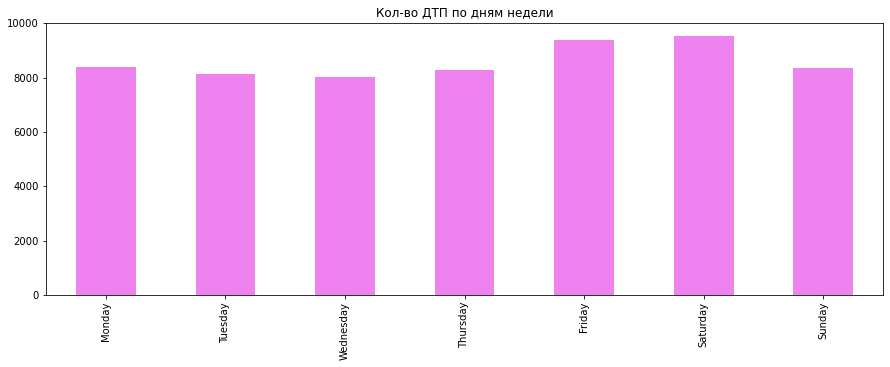

In [112]:
#Отобразим результат на графике
dtp_by_weekday.plot(
kind='bar',
title='Кол-во ДТП по дням недели',
color='violet',
figsize=(15,5))

In [113]:
#Выводим месяц ДТП
dtp_all['month_name']=dtp_all['datetime'].dt.month_name()

In [114]:
#Задаем порядок
month_order = ["January", "February", "March", 
                 "April", "May", "June", "July","August","September","October","November","December"]

In [115]:
#Считаем кол-во аварий по месяцам
dtp_by_month = dtp_all['month_name'].value_counts().reindex(month_order)
display(dtp_by_month)

January      4323
February     3552
March        3679
April        4047
May          5181
June         5775
July         6036
August       6441
September    5941
October      5446
November     4818
December     4896
Name: month_name, dtype: int64

<AxesSubplot:title={'center':'Кол-во ДТП по месяцам'}>

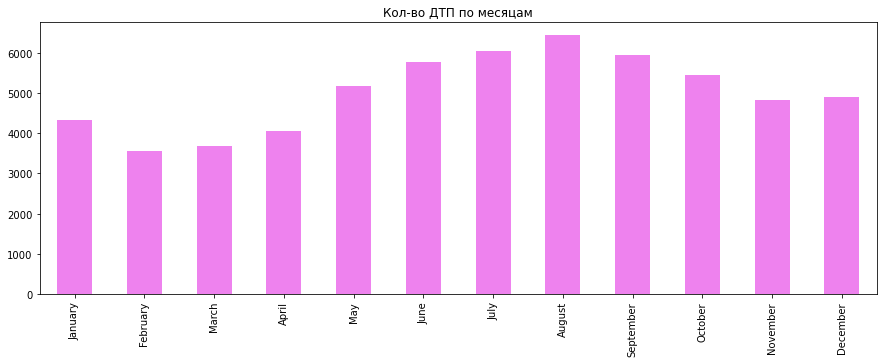

In [116]:
#Рисуем график
dtp_by_month.plot(
kind='bar',
color='violet',
figsize=(15,5),
title='Кол-во ДТП по месяцам')

Таким образом, большинство ДТП по статистике происходит в Августе и Июле.По дням недели лидеры по количесву ДТП - Пятница и Суббота. Меньше всего аварий происходит в Феврале и Марте, также меньше всего аварий за неделю случается во Вторник и Среду.

Теперь необходимо выделить категории водителей по стажу. Для начала объединим 2 датафрейма с данными о стаже.

In [117]:
#Объединяем данные по категориям
par_all = pd.concat([Kir_par,Mos_par],ignore_index=True)

In [118]:
#Выводим информацию о датафрейме
par_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81257 entries, 0 to 81256
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   role                         81257 non-null  object
 1   gender                       81257 non-null  object
 2   violations                   81257 non-null  object
 3   health_status                81257 non-null  object
 4   years_of_driving_experience  81257 non-null  object
 5   id                           81257 non-null  int32 
dtypes: int32(1), object(5)
memory usage: 3.4+ MB


In [119]:
#Выведем все категории стажа, которые присутствуют
par_all['years_of_driving_experience'].unique()

array([26.0, 34.0, 'Unknown', 27.0, 5.0, 3.0, 7.0, 19.0, 2.0, 15.0, 29.0,
       12.0, 39.0, 23.0, 13.0, 1.0, 24.0, 25.0, 35.0, 6.0, 11.0, 21.0,
       16.0, 31.0, 4.0, 30.0, 20.0, 43.0, 9.0, 10.0, 37.0, 28.0, 22.0,
       36.0, 38.0, 33.0, 8.0, 49.0, 41.0, 40.0, 18.0, 14.0, 32.0, 42.0,
       17.0, 57.0, 46.0, 58.0, 45.0, 44.0, 62.0, 47.0, 52.0, 48.0, 53.0,
       50.0, 51.0, 59.0, 54.0, 55.0, 60.0, 61.0, 56.0, 66.0, 64.0, 63.0,
       65.0, 69.0, 67.0], dtype=object)

Для разбивки на категории выберем период - 10 лет. 


In [120]:
#Приводим данные в нужный формат, чтоб разбить на категории
par_all['years_of_driving_experience'] = pd.to_numeric(
    par_all['years_of_driving_experience'], errors='coerce'
)

In [121]:
#Разбиваем данные на категории
bins=[0,10,20,30,40,50,60,70]
par_all['exp_category']=pd.cut(par_all['years_of_driving_experience'],
                              bins=bins,
                              right=True)

In [122]:
#Считаем кол-во ДТП по категориям
exp_cat_count = par_all['exp_category'].value_counts()
display(exp_cat_count)

(0, 10]     18428
(10, 20]    14577
(20, 30]     7754
(30, 40]     3857
(40, 50]     1363
(50, 60]      282
(60, 70]       34
Name: exp_category, dtype: int64

<AxesSubplot:title={'center':'Количество ДТП в зависимости от стажа водителя'}>

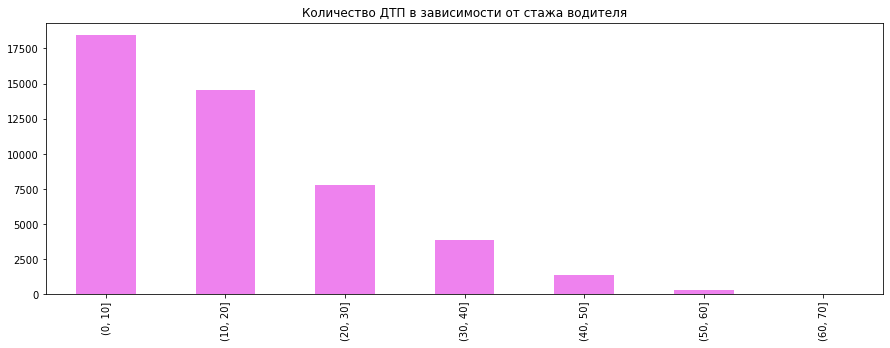

In [123]:
#Рисуем график
exp_cat_count.plot(
kind='bar',
color='violet',
title = 'Количество ДТП в зависимости от стажа водителя',
figsize=(15,5))

Из графика видно, что большинсто ДТП совершается с участниками движения, стаж которых от 0 до 10 лет и выше, то есть - с неопытными водителями. Стоит также учесть, что у нас нет сведений о том, сколько водителей в каждой категории. Также в этом столбце были обнаружены пропуски, т.е. есть участники, которые не попали ни в одну категорию, потому что их стаж неизвестен.

Теперь проанализируем, как менялось число аварий по годам в Кировской и Московской областях. При этом включим город Киров в соответствующую область, а Москву исключим. Также определим, в какой области больше аварий в относительном выражении — в пересчёте на 100 тысяч жителей.

In [124]:
#Создаем столбец с годом ДТП
dtp_all['year']=dtp_all['datetime'].dt.year

Численность населения Кировской области (данные из Википедии)
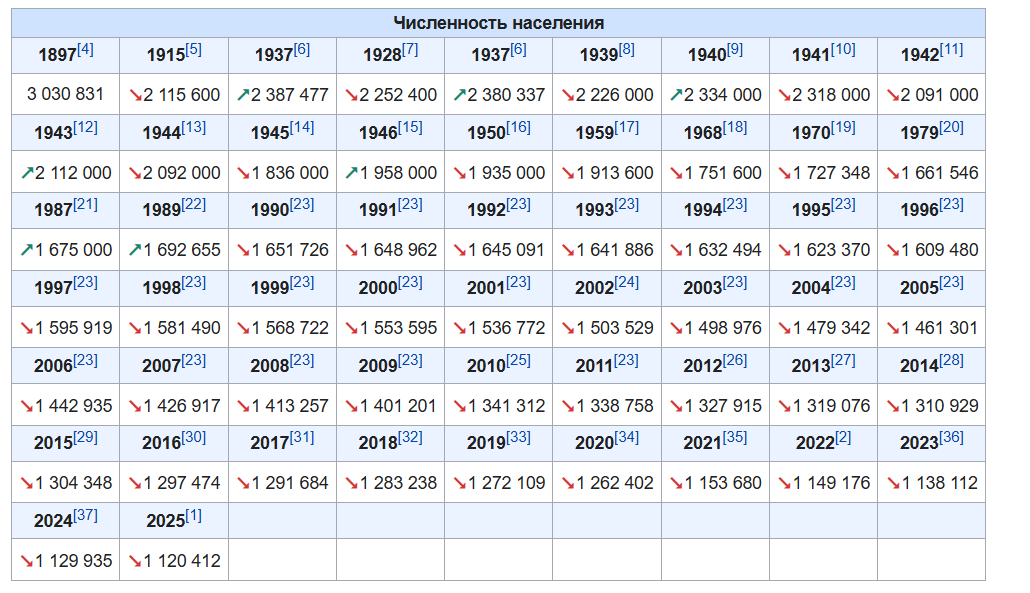

Численность населения Московской области (данные из Википедии)
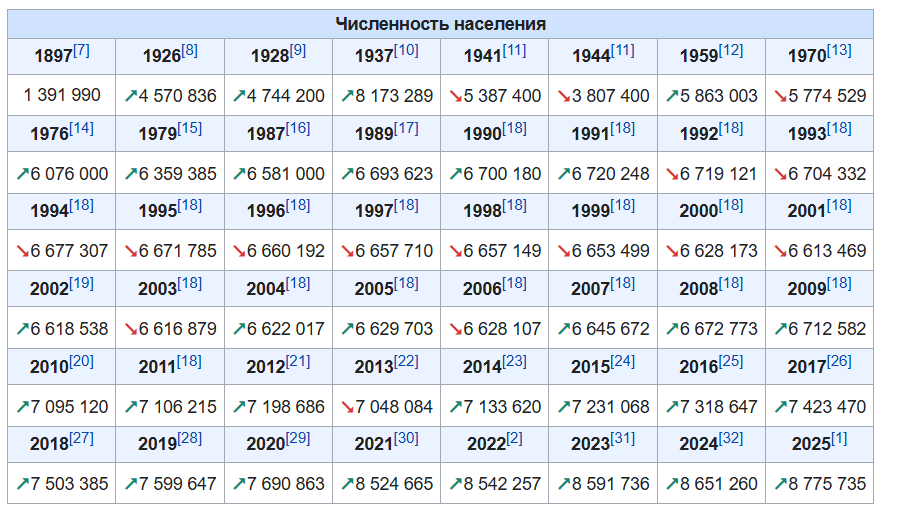

In [125]:
# считаем количество ДТП по годам
dtp_counts = dtp_all['year'].value_counts().sort_index()

# превращаем в датафрейм
dtp_on_years = dtp_counts.to_frame(name="count").reset_index()
dtp_on_years.rename(columns={"index": "year"}, inplace=True)

# добавляем население
dtp_on_years['population'] = [85, 86, 87, 88, 89, 90, 96, 96, 97, 97]

# считаем показатель ДТП на 100тыс человек
dtp_on_years['dtp_on_100k'] = round(
    dtp_on_years['count'] / dtp_on_years['population'], 2
)

dtp_on_years

,year,count,population,dtp_on_100k
0,2015,8175,85,96.18
1,2016,7262,86,84.44
2,2017,7199,87,82.75
3,2018,6714,88,76.30
4,2019,6679,89,75.04
5,2020,5714,90,63.49
6,2021,5422,96,56.48
7,2022,4739,96,49.36
8,2023,4858,97,50.08
9,2024,3373,97,34.77


Таким образом, количество аварий на 100 тысяч жителей снижается в Кировской и Московской областях.

# Выводы и рекомендации заказчику

#### Рекомендации заказчику:

* Использовать названия столбцов без 'properties_', это удлинняет названия.
* Выяснить причины, почему некоторые адреса не заполнены. Если этот столбец важен, сделать его заполнение обязательным.
* Дубликатов не обнаружено, идентификаторы аварий уникальны.
* Форматы данных неоптимальны, можно использовать типы данных, которые занимают меньше места для экономии.  

#### Выводы:

* Аварий в летние месяцы больше. По дням недели есть тенденция большего числа ДТП на выходных.
* По имеющимся данным, с ростом стажа аварий становится меньше, но важно также учитывать, сколько водителей в каждой категории по стажу.